In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import morton
import numpy as np

In [71]:
# morton boundaries right outliers:
min_bound = 17179869184 # (2^34)
max_bound = 28612409360 # (lane change 31 max morton value)

##### variables changed throughout experiment #####
# range width of morton values to cover
value_range = 1000000000
# increase step
increase_step = 131072*2*2*2
# change the area interested
#min_bound += 10000000000
# determine new max_bound for testing
max_bound = min_bound + value_range
# create list containing morton_values in specified range
#morton_range_list = list(range(min_bound,max_bound))
morton_range_list = np.arange(min_bound, max_bound, increase_step).tolist()

##### code that remains constant #####

# create df containing morton values in the range
df_morton_analysis = pd.DataFrame(morton_range_list, columns=['morton'])

# add sensor columns that will contain unpacked data
df_morton_analysis[['IMULatAcceleration', 'SteeringWhlAngle']] = 0

# specify morton encoding
m = morton.Morton(dimensions=2, bits=18)

# iterate through df_morton_analysis
for i in range(0, len(df_morton_analysis.index)):
    # extract current sensor_values
    sensor_values = m.unpack(int(df_morton_analysis.loc[i,['morton']]))
    # put sensor_values in appropriate column and index
    df_morton_analysis.loc[i, ['IMULatAcceleration']] = sensor_values[0]
    df_morton_analysis.loc[i, ['SteeringWhlAngle']] = sensor_values[1]

df_morton_analysis

,morton,IMULatAcceleration,SteeringWhlAngle
0,17179869184,131072,0
1,17180917760,132096,0
2,17181966336,131072,1024
3,17183014912,132096,1024
4,17184063488,133120,0
...,...,...,...
949,18174967808,154624,28672
950,18176016384,153600,29696
951,18177064960,154624,29696
952,18178113536,151552,30720


In [21]:
###### TEST #####
min_bound = 17179869184 # (2^34)
#min_bound = 27965538677 # (lane change 31 random outlier morton value)
#min_bound = 28087995466 # (lane change 31 min right outlier morton value)

max_bound = 28612409360 # (lane change 31 max morton value)
# range width of morton values to cover
value_range = 32


# change the area interested
#min_bound += 10000000000
# determine new max_bound for testing
max_bound = min_bound + value_range
# create list containing morton_values in specified range
morton_range_list = list(range(min_bound, (max_bound+1)))


In [73]:
# TEST 1: EXPONENTIAL GROWTH

# increase step
increase_step = 1

for i in range(0, (len(morton_range_list))):
    morton_range_list[i] = min_bound + increase_step
    increase_step *= 2

In [74]:
# TEST 2: EXP. GROWTH IN FIRST HALF, EXP. DECREASE SECOND HALF

# increase step is a large power of 2 to show exp. growth with fewer steps
increase_step = 65536

for i in range(0, (int(len(morton_range_list)/2))):
    morton_range_list[i] = min_bound + increase_step
    increase_step *= 2
for i in range((int(len(morton_range_list)/2)), (len(morton_range_list))):
    morton_range_list[i] = min_bound + increase_step
    increase_step /= 2

In [17]:
# TEST 3: EXP. GROWTH WITH INCREASE STEP 3

# increase step
increase_step = 3

for i in range(0, (len(morton_range_list))):
    morton_range_list[i] = min_bound + increase_step
    increase_step *= 4

In [76]:
# TEST 4: BELL SHAPE TEST

# increase step is a large power of 2 to show exp. growth with fewer steps
increase_step = 65536*2*16

for i in range(0, (int(len(morton_range_list)/2))):
    morton_range_list[i] = min_bound + increase_step
    increase_step /= 2
for i in range((int(len(morton_range_list)/2)), (len(morton_range_list))):
    morton_range_list[i] = min_bound + increase_step
    increase_step *= 2

In [77]:
# TEST 5: LINEAR GROWTH USING LC31 OUTLIER BOUNDARIES
min_bound = 28087995466 # (lane change 31 min right outlier morton value)
max_bound = 28735866149 # (lane change 31 max right outlier morton value)

value_range = (max_bound - min_bound)
max_bound = min_bound + value_range

# create list containing morton_values in specified range
#morton_range_list = list(range(min_bound, (max_bound+1)))

# increase step
increase_step = 10000000

morton_range_list = np.arange(min_bound, max_bound, increase_step).tolist()


In [30]:
# TEST 6: BIT SHIFTING
# increase step
increase_step = 3

for i in range(0, (len(morton_range_list))):
    morton_range_list[i] = min_bound + increase_step
    # a << n == a * 2^n
    increase_step *= 2**2

In [31]:
##### DATAFRAME CREATION #####

# create df containing morton values in the range
df_morton_analysis = pd.DataFrame(morton_range_list, columns=['morton'])

# add sensor columns that will contain unpacked data
df_morton_analysis[['IMULatAcceleration', 'SteeringWhlAngle']] = 0

# specify morton encoding
m = morton.Morton(dimensions=2, bits=18)

# iterate through df_morton_analysis
for i in range(0, len(df_morton_analysis.index)):
    # extract current sensor_values
    sensor_values = m.unpack(int(df_morton_analysis.loc[i,['morton']]))
    # put sensor_values in appropriate column and index
    df_morton_analysis.loc[i, ['IMULatAcceleration']] = sensor_values[0]
    df_morton_analysis.loc[i, ['SteeringWhlAngle']] = sensor_values[1]

df_morton_analysis

,morton,IMULatAcceleration,SteeringWhlAngle
0,17179869187,131073,1
1,17179869196,131074,2
2,17179869232,131076,4
3,17179869376,131080,8
4,17179869952,131088,16
5,17179872256,131104,32
6,17179881472,131136,64
7,17179918336,131200,128
8,17180065792,131328,256
9,17180655616,131584,512


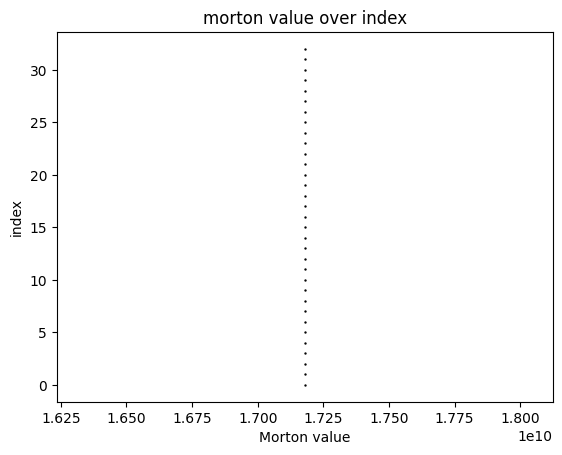

In [24]:
plt.scatter(x=df_morton_analysis['morton'],y=df_morton_analysis.index, c='black', s=0.5)
plt.title("morton value over index")
plt.xlabel("Morton value")
plt.ylabel("index")
plt.show()

<Axes: title={'center': 'Lateral acceleration and Steering angle against index'}, xlabel='index', ylabel='Steering Angle (°) | Lateral Acceleration (m/s²)'>

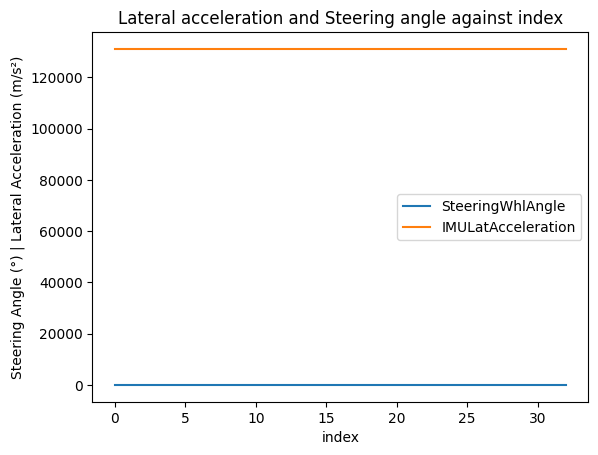

In [25]:
df_morton_analysis.plot(y=['SteeringWhlAngle', 'IMULatAcceleration'], title='Lateral acceleration and Steering angle against index', xlabel='index', ylabel='Steering Angle (°) | Lateral Acceleration (m/s\u00B2)', use_index=True)